In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# 📌 Load California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Target"] = housing.target  # Adding target variable

In [3]:
# 🔎 Data exploration
print(df.info())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [4]:
print(df.describe())  # Summary statistics

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [5]:
# 📌 Data Preprocessing: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=["Target"]))
X = pd.DataFrame(scaled_features, columns=housing.feature_names)
y = df["Target"]

In [6]:
# 📌 Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 📌 Define models again
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor (SVR)": SVR()  
}


In [11]:
# 📌 Train models & evaluate performance
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predictions

In [ ]:
# 📊 Compute evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": name, "MSE": mse, "MAE": mae, "R²": r2})
    print(f"📌 {name}: MSE={mse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")

In [ ]:
# 📊 Convert results into a DataFrame
results_df = pd.DataFrame(results).sort_values(by="MSE")
print("\n🔹 Model Performance Comparison:")
print(results_df)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Assuming `X_train, X_test, y_train, y_test` exist
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor (SVR)": SVR()
}

In [18]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, mae, r2])

In [19]:
# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R²"])
print(results_df)

                            Model       MSE       MAE        R²
0               Linear Regression  0.555892  0.533200  0.575788
1         Decision Tree Regressor  0.487938  0.453472  0.627645
2         Random Forest Regressor  0.254958  0.327372  0.805436
3     Gradient Boosting Regressor  0.294080  0.371723  0.775581
4  Support Vector Regressor (SVR)  0.355198  0.397763  0.728941


C:\Users\beefa\AppData\Local\Temp\ipykernel_15028\3040959536.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")


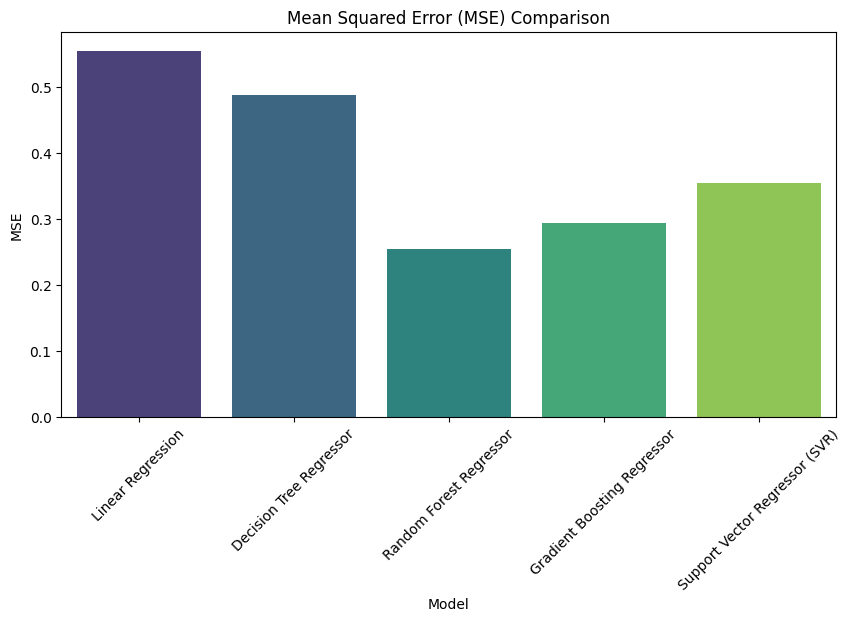

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MSE", data=results_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Mean Squared Error (MSE) Comparison")
plt.show()
